In [130]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
# Using OS library to call CLI commands in Python
os.system("snscrape --jsonl --max-results 10000 --since 2020-06-01 twitter-search 'from:joshuamschultz' > user-tweets.json")


0

In [132]:
tweets_df = pd.read_json('user-tweets.json', lines=True)
tweets_df.set_index('id',inplace=True)
tweets_df.columns

Index(['_type', 'url', 'date', 'content', 'renderedContent', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates',
       'place', 'hashtags', 'cashtags'],
      dtype='object')

In [133]:
tweets_df.head(15)
tweets_df.drop('_type', axis=1)

,url,date,content,renderedContent,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
id,,,,,,,,,,,,,,,,,,,,,
1412100186667720704,https://twitter.com/joshuamschultz/status/1412...,2021-07-05 17:24:54+00:00,@pslohmann Of course\n\nI’ll email you the wor...,@pslohmann Of course\n\nI’ll email you the wor...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,1412094871100350471,...,None,NaN,None,1.412099e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None
1412098799263227906,https://twitter.com/joshuamschultz/status/1412...,2021-07-05 17:19:23+00:00,@RyanGoral Not yet.\n\nI was thinking of doing...,@RyanGoral Not yet.\n\nI was thinking of doing...,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,0,0,1412094871100350471,...,None,NaN,None,1.412098e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None
1412096623547752448,https://twitter.com/joshuamschultz/status/1412...,2021-07-05 17:10:45+00:00,@zachware Ha. I actually don’t know how I got ...,@zachware Ha. I actually don’t know how I got ...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,1412094871100350471,...,None,NaN,None,1.412096e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None
1412094873004560388,https://twitter.com/joshuamschultz/status/1412...,2021-07-05 17:03:47+00:00,Also created an excel file of all tweets over ...,Also created an excel file of all tweets over ...,"{'_type': 'snscrape.modules.twitter.User', 'us...",2,0,1,0,1412094871100350471,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,None,1.412095e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...",None,None,None,None,None
1412094871100350471,https://twitter.com/joshuamschultz/status/1412...,2021-07-05 17:03:47+00:00,Some fun on analyzing tweets by engagement tod...,Some fun on analyzing tweets by engagement tod...,"{'_type': 'snscrape.modules.twitter.User', 'us...",2,0,4,0,1412094871100350471,...,"[{'_type': 'snscrape.modules.twitter.Gif', 'th...",NaN,None,NaN,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267486567205044225,https://twitter.com/joshuamschultz/status/1267...,2020-06-01 16:02:01+00:00,"As this becomes more mainstream and ""understan...","As this becomes more mainstream and ""understan...","{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,1267486567205044225,...,None,NaN,None,NaN,None,None,None,None,"[warehouse, supplychain, Robotics, DigitalTran...",None
1267440885366763526,https://twitter.com/joshuamschultz/status/1267...,2020-06-01 13:00:29+00:00,@CliffPCarey Thank you 🙏,@CliffPCarey Thank you 🙏,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,1267432005391863808,...,None,NaN,None,1.267432e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None
1267395979386462208,https://twitter.com/joshuamschultz/status/1267...,2020-06-01 10:02:03+00:00,“Community Load Match enables shippers to use ...,“Community Load Match enables shippers to use ...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,1267395979386462208,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,None,NaN,None,None,None,None,None,None


In [134]:
tweets_df = tweets_df[['date','url', 'renderedContent', 'replyCount', 'retweetCount', 'likeCount', 'quoteCount']]
tweets_df.head(3)

,date,url,renderedContent,replyCount,retweetCount,likeCount,quoteCount
id,,,,,,,
1412100186667720704,2021-07-05 17:24:54+00:00,https://twitter.com/joshuamschultz/status/1412...,@pslohmann Of course\n\nI’ll email you the wor...,0,0,0,0
1412098799263227906,2021-07-05 17:19:23+00:00,https://twitter.com/joshuamschultz/status/1412...,@RyanGoral Not yet.\n\nI was thinking of doing...,1,0,0,0
1412096623547752448,2021-07-05 17:10:45+00:00,https://twitter.com/joshuamschultz/status/1412...,@zachware Ha. I actually don’t know how I got ...,0,0,0,0


In [135]:
tweets_df['engagement'] = (.2 * tweets_df['replyCount']) + ( .3 *tweets_df['retweetCount']) + (.1 * tweets_df['likeCount']) + (.4 * tweets_df['quoteCount'])
tweets_df

,date,url,renderedContent,replyCount,retweetCount,likeCount,quoteCount,engagement
id,,,,,,,,
1412100186667720704,2021-07-05 17:24:54+00:00,https://twitter.com/joshuamschultz/status/1412...,@pslohmann Of course\n\nI’ll email you the wor...,0,0,0,0,0.0
1412098799263227906,2021-07-05 17:19:23+00:00,https://twitter.com/joshuamschultz/status/1412...,@RyanGoral Not yet.\n\nI was thinking of doing...,1,0,0,0,0.2
1412096623547752448,2021-07-05 17:10:45+00:00,https://twitter.com/joshuamschultz/status/1412...,@zachware Ha. I actually don’t know how I got ...,0,0,0,0,0.0
1412094873004560388,2021-07-05 17:03:47+00:00,https://twitter.com/joshuamschultz/status/1412...,Also created an excel file of all tweets over ...,2,0,1,0,0.5
1412094871100350471,2021-07-05 17:03:47+00:00,https://twitter.com/joshuamschultz/status/1412...,Some fun on analyzing tweets by engagement tod...,2,0,4,0,0.8
...,...,...,...,...,...,...,...,...
1267486567205044225,2020-06-01 16:02:01+00:00,https://twitter.com/joshuamschultz/status/1267...,"As this becomes more mainstream and ""understan...",0,0,0,0,0.0
1267440885366763526,2020-06-01 13:00:29+00:00,https://twitter.com/joshuamschultz/status/1267...,@CliffPCarey Thank you 🙏,0,0,0,0,0.0
1267395979386462208,2020-06-01 10:02:03+00:00,https://twitter.com/joshuamschultz/status/1267...,“Community Load Match enables shippers to use ...,0,0,0,0,0.0


In [136]:
tweets_df.sort_values(by='engagement', ascending=False, inplace=True)
tweets_df.head()

,date,url,renderedContent,replyCount,retweetCount,likeCount,quoteCount,engagement
id,,,,,,,,
1347362517325131777,2021-01-08 02:00:31+00:00,https://twitter.com/joshuamschultz/status/1347...,Getting from $1m to $3.5m is extremely difficu...,42,70,707,15,106.1
1302046564689604609,2020-09-05 00:51:06+00:00,https://twitter.com/joshuamschultz/status/1302...,As someone that has constantly battled the dem...,14,35,237,9,40.6
1394073490316222471,2021-05-16 23:33:15+00:00,https://twitter.com/joshuamschultz/status/1394...,This will shock NO ONE on twitter... but IRL -...,22,16,175,14,32.3
1398618185088262151,2021-05-29 12:32:15+00:00,https://twitter.com/joshuamschultz/status/1398...,"Older I get, the more I realize everything is ...",8,19,164,4,25.3
1304419971758534656,2020-09-11 14:02:10+00:00,https://twitter.com/joshuamschultz/status/1304...,"How to find a small business to buy, the best ...",8,12,176,2,23.6


In [137]:
# Localize Time

tweets_df['date'] = tweets_df['date'].dt.tz_localize(None)

In [138]:
tweets_df.to_excel('tweets.xlsx')

In [139]:
## Time of Day / Day of Week

In [140]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hours = range(0,24)

In [141]:
# Grab weekday
tweets_df['weekday'] = tweets_df.date.dt.weekday

In [142]:
# Grab hour
tweets_df['hours'] = tweets_df.date.dt.hour

In [143]:
tweets_df.head(4)

,date,url,renderedContent,replyCount,retweetCount,likeCount,quoteCount,engagement,weekday,hours
id,,,,,,,,,,
1347362517325131777,2021-01-08 02:00:31,https://twitter.com/joshuamschultz/status/1347...,Getting from $1m to $3.5m is extremely difficu...,42,70,707,15,106.1,4,2
1302046564689604609,2020-09-05 00:51:06,https://twitter.com/joshuamschultz/status/1302...,As someone that has constantly battled the dem...,14,35,237,9,40.6,5,0
1394073490316222471,2021-05-16 23:33:15,https://twitter.com/joshuamschultz/status/1394...,This will shock NO ONE on twitter... but IRL -...,22,16,175,14,32.3,6,23
1398618185088262151,2021-05-29 12:32:15,https://twitter.com/joshuamschultz/status/1398...,"Older I get, the more I realize everything is ...",8,19,164,4,25.3,5,12


In [144]:
# Collect data

# each row is a day of the week
# each column is an hour

grid = np.zeros([7,24])

for index, row in tweets_df.iterrows():
    grid[row['weekday']][row['hours']] += row['engagement']

grid

array([[7.700e+00, 4.060e+01, 5.440e+01, 1.340e+01, 4.700e+00, 1.200e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.100e+00, 6.400e+00,
        2.850e+01, 5.680e+01, 5.940e+01, 9.830e+01, 5.190e+01, 3.250e+01,
        3.440e+01, 3.550e+01, 2.200e+01, 1.810e+01, 1.030e+01, 7.700e+00],
       [5.800e+00, 3.420e+01, 6.500e+00, 1.210e+01, 1.710e+01, 3.400e+00,
        1.000e-01, 1.000e-01, 2.000e-01, 0.000e+00, 0.000e+00, 3.400e+00,
        3.830e+01, 2.140e+01, 6.200e+01, 4.590e+01, 2.090e+01, 3.500e+01,
        2.270e+01, 1.960e+01, 5.700e+00, 1.900e+01, 3.140e+01, 6.800e+00],
       [2.400e+01, 6.450e+01, 1.900e+01, 4.040e+01, 5.200e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e-01, 2.100e+00, 1.390e+01,
        2.640e+01, 1.660e+01, 4.180e+01, 5.690e+01, 5.030e+01, 2.600e+01,
        4.210e+01, 1.630e+01, 1.480e+01, 4.600e+00, 5.090e+01, 3.600e+00],
       [5.020e+01, 1.320e+01, 1.900e+01, 9.100e+00, 8.800e+00, 6.000e+00,
        2.000e+00, 0.000e+00, 0.000

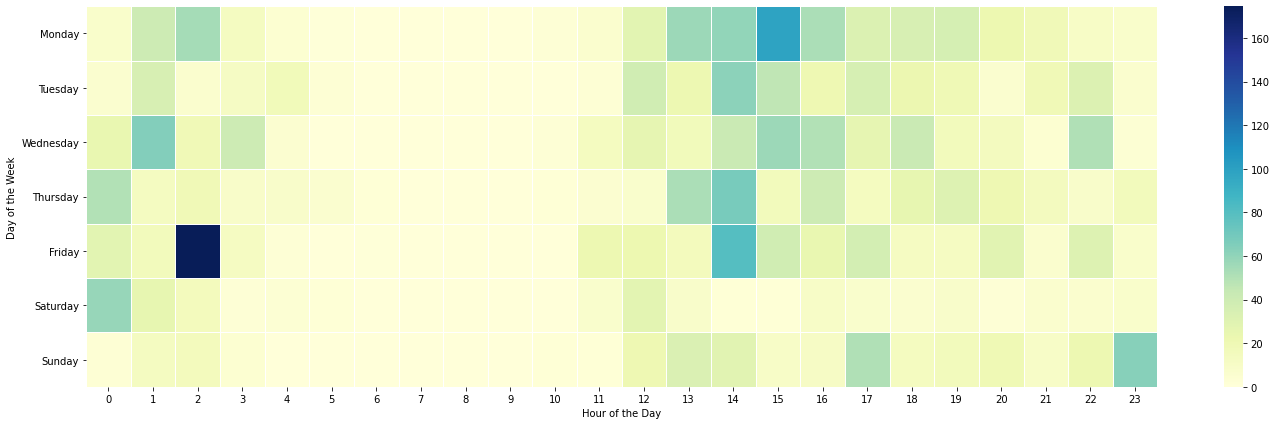

In [145]:
fig, ax = plt.subplots(figsize=(24,7))         # Sample figsize in inches

heatmap = sns.heatmap(grid, annot=False, linewidths=.5, ax=ax, cmap="YlGnBu", yticklabels=True, xticklabels=True)

ax.set_xticklabels(hours)
ax.set_yticklabels(days)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_yticklabels(), rotation=0, ha="right", rotation_mode="anchor")

plt.xlabel("Hour of the Day")
plt.ylabel('Day of the Week')

plt.show()

In [146]:
## Data Cleaning

In [147]:
tweet = tweets_df.iloc[4].renderedContent
tweet

'How to find a small business to buy, the best listings, and what its going to take to execute it.\n\nSince I seem to be deeply entrenched in Micro PE twitter now, and keep seeing this question. Here you go.'

In [148]:
# Remove Emojis
import re
regex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)

In [149]:
# Remove Links
pattern = re.compile(r'(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?')

In [150]:
# Remove hashes and mentions
re_list = ['@[A-Za-z0–9_]+', '#']
combined_re = re.compile( '|'.join( re_list) )

In [151]:
# Remove HTML Text & Formatting
from bs4 import BeautifulSoup


del_amp = BeautifulSoup(tweet, 'lxml')
del_amp_text = del_amp.get_text()
del_amp_text

'How to find a small business to buy, the best listings, and what its going to take to execute it.\n\nSince I seem to be deeply entrenched in Micro PE twitter now, and keep seeing this question. Here you go.'

In [152]:
# Full cleaning method
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
token = WordPunctTokenizer()
def cleaning_tweets(t):
    del_amp = BeautifulSoup(t, 'lxml')
    del_amp_text = del_amp.get_text()
    del_link_mentions = re.sub(combined_re, '', del_amp_text)
    del_emoticons = re.sub(regex_pattern, '', del_link_mentions)
    lower_case = del_emoticons.lower()
    words = token.tokenize(lower_case) #tokenize words
    result_words = [x for x in words if len(x) > 2]
    return (" ".join(result_words)).strip()

In [153]:
print("Cleaning the tweets...\n")
tweets_df = tweets_df.head(200) # only take the top 200 tweets
cleaned_tweets = []
for i in range(0,len(tweets_df)): 
    if( (i+1)%100 == 0 ):
        print("Tweets {} of {} have ben processed".format(i+1,3000))                                                                  
    cleaned_tweets.append(cleaning_tweets((tweets_df.renderedContent.values[i])))

Cleaning the tweets...

Tweets 100 of 3000 have ben processed
Tweets 200 of 3000 have ben processed


/Users/joshschultz/miniconda/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://t.co/rkOcFacV4M" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


In [154]:
## Word Cloud

In [155]:
## Create word list
string = pd.Series(cleaned_tweets).str.cat(sep=' ')

In [156]:
## Add stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

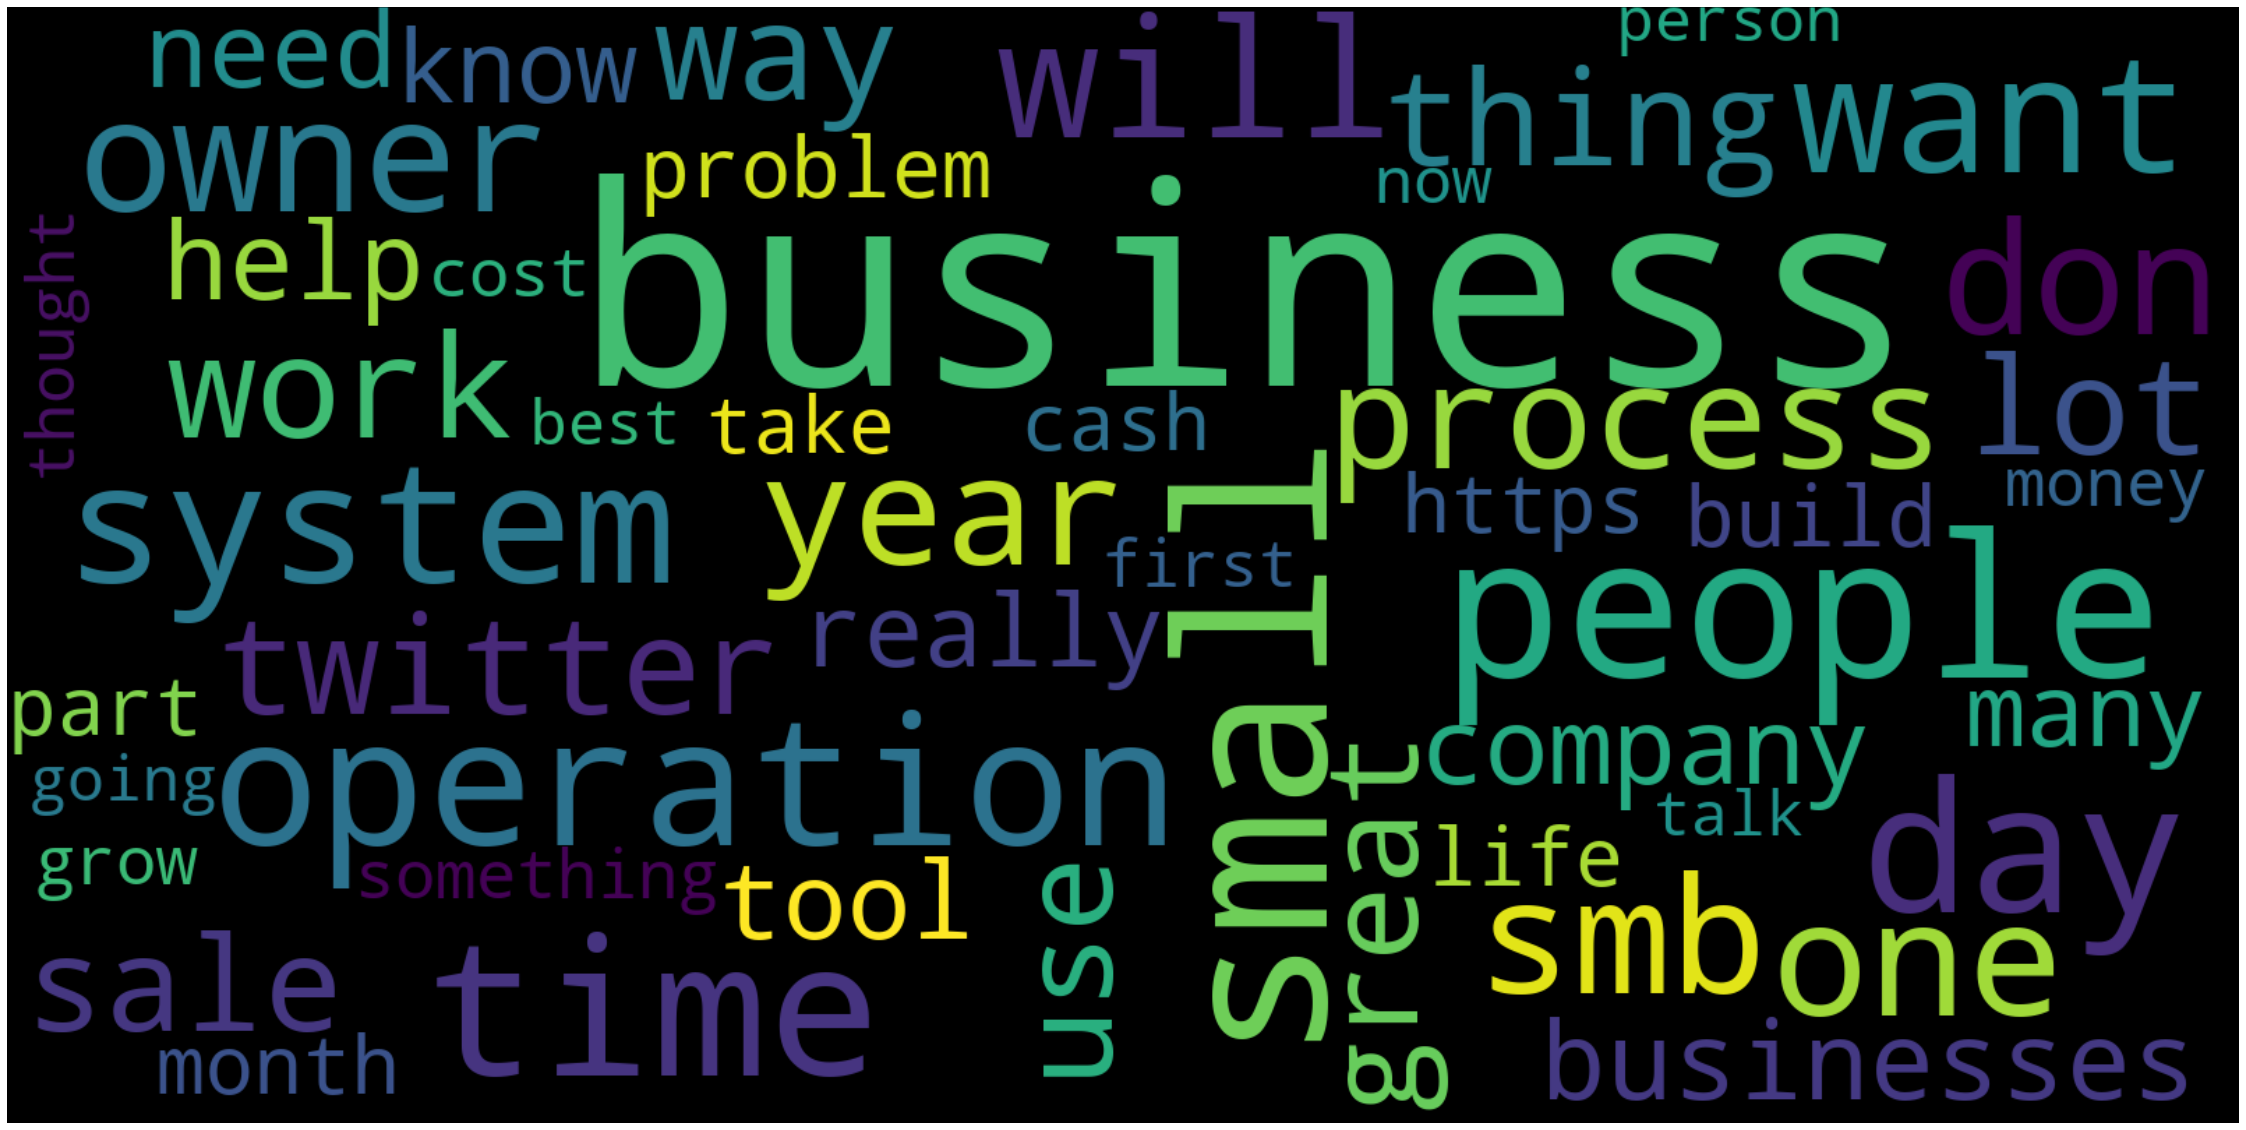

In [157]:
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False, background_color='black').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()